In [28]:
import numpy as np
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.mixture as skmix
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)

In [29]:
df_athletes = pd.read_csv('AusAthletes.csv')  # df means "DataFrame"

In [30]:
df_athletes.head() #glance at the data

,Sex,Ht,Wt,LBM,RCC,WCC,Hc,Hg,Ferr,BMI,SSF,Bfat,Label,Sport
0,1,195.9,78.9,63.32,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,f-b_ball,b_ball
1,1,189.7,74.4,58.55,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,f-b_ball,b_ball
2,1,177.8,69.1,55.36,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,f-b_ball,b_ball
3,1,185.0,74.9,57.18,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,f-b_ball,b_ball
4,1,184.6,64.6,53.20,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,f-b_ball,b_ball


In [31]:
df_athletesMale = df_athletes[df_athletes['Sex'] < 1] #remove females from dataset because of variations
df_athletesMale.head()

,Sex,Ht,Wt,LBM,RCC,WCC,Hc,Hg,Ferr,BMI,SSF,Bfat,Label,Sport
100,0,172.7,67.0,61,5.13,7.1,46.8,15.9,34,22.46,44.5,8.47,m-swim,swim
101,0,176.5,74.4,69,4.83,7.6,45.2,15.2,97,23.88,41.8,7.68,m-swim,swim
102,0,183.0,79.3,74,5.09,4.7,46.6,15.9,55,23.68,33.7,6.16,m-swim,swim
103,0,194.4,87.5,80,5.17,4.1,44.9,15.0,76,23.15,50.9,8.56,m-swim,swim
104,0,193.4,83.5,78,5.11,6.7,46.1,15.6,93,22.32,40.5,6.86,m-swim,swim


In [32]:
df_athletesNew = df_athletesMale.drop(df_athletesMale[[0,3,4,5,6,8,10,12]], axis=1) #drop irrelevant columns
df_athletesNew.head()

,Ht,Wt,Hg,BMI,Bfat,Sport
100,172.7,67.0,15.9,22.46,8.47,swim
101,176.5,74.4,15.2,23.88,7.68,swim
102,183.0,79.3,15.9,23.68,6.16,swim
103,194.4,87.5,15.0,23.15,8.56,swim
104,193.4,83.5,15.6,22.32,6.86,swim


In [33]:
df_athletesNew.Hg.corr(df_athletesNew.Bfat) #correlation between Hg and Bfat

0.10175000752244548

In [34]:
corMatrix = df_athletesNew.loc[:,['Ht', 'Wt', 'Hg', 'BMI', 'Bfat']].corr()
corMatrix #correlation matrix of variables
#shows correlations of different variables

,Ht,Wt,Hg,BMI,Bfat
Ht,1.000000,0.666471,-0.174656,0.151681,0.192382
Wt,0.666471,1.000000,0.116174,0.835521,0.580609
Hg,-0.174656,0.116174,1.000000,0.289958,0.101750
BMI,0.151681,0.835521,0.289958,1.000000,0.627027
Bfat,0.192382,0.580609,0.101750,0.627027,1.000000


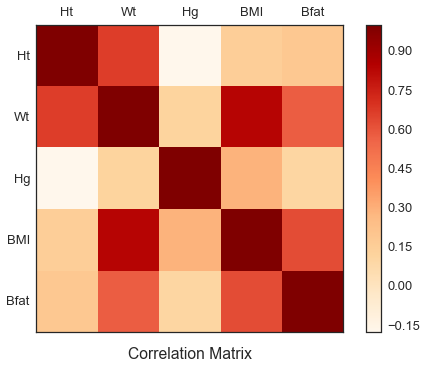

In [35]:
#plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corMatrix, cmap=plt.cm.OrRd)
fig.colorbar(cax)

tags = ['']+corMatrix.columns.tolist()
ax.set_xticklabels(tags)
ax.set_yticklabels(tags)
plt.title('Correlation Matrix', y=-0.1)

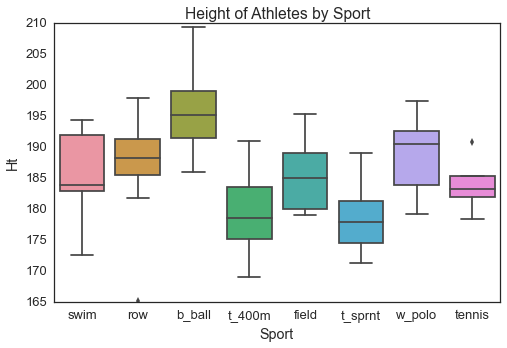

In [36]:
#height boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sport', y='Ht', 
            data=df_athletesNew);
plt.title('Height of Athletes by Sport')
#tennis has small IQR

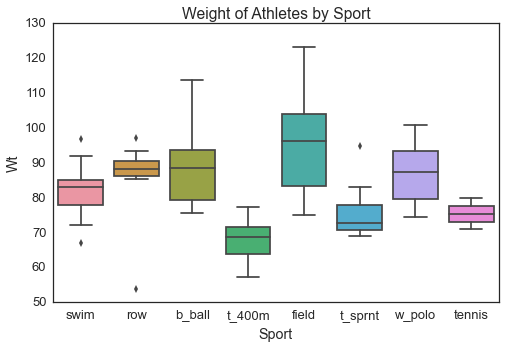

In [37]:
#weight boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sport', y='Wt', 
            data=df_athletesNew);
plt.title('Weight of Athletes by Sport')
#tennis has small IQR, field has large IQR

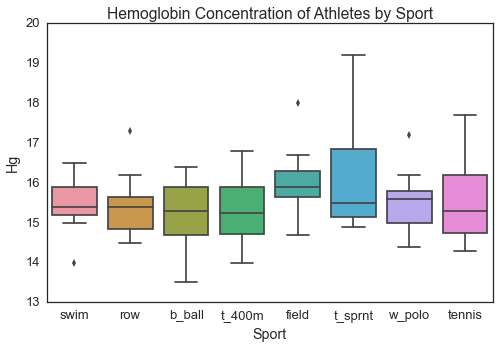

In [38]:
#Hg boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sport', y='Hg', 
            data=df_athletesNew);
plt.title('Hemoglobin Concentration of Athletes by Sport')
#t_sprint seems to have the highest distribution

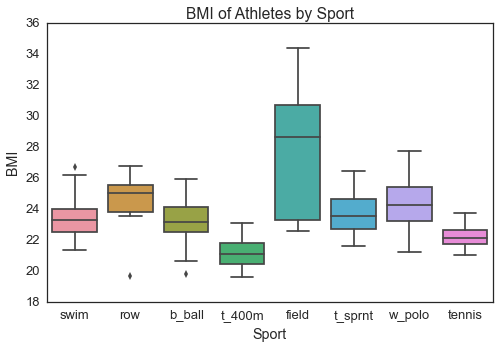

In [39]:
#BMI boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sport', y='BMI', 
            data=df_athletesNew);
plt.title('BMI of Athletes by Sport')
#tennis has small IQR, field has large IQR

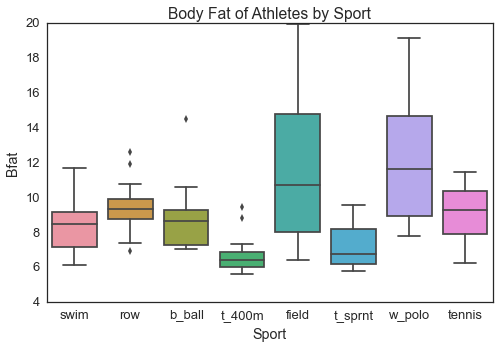

In [40]:
#Bfat boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sport', y='Bfat', 
            data=df_athletesNew);
plt.title('Body Fat of Athletes by Sport')

In [41]:
#change to nominal data
df_athletesNew['b_ball'] = np.where(df_athletesNew['Sport'] == 'b_ball', 1, 0)
df_athletesNew['row'] = np.where(df_athletesNew['Sport'] == 'row', 1, 0)
df_athletesNew['swim'] = np.where(df_athletesNew['Sport'] == 'swim', 1, 0)
df_athletesNew['t_400m'] = np.where(df_athletesNew['Sport'] == 't_400m', 1, 0)
df_athletesNew['w_polo'] = np.where(df_athletesNew['Sport'] == 'w_polo', 1, 0)
df_athletesNew['t_sprnt'] = np.where(df_athletesNew['Sport'] == 't_sprnt', 1, 0)
df_athletesNew['field'] = np.where(df_athletesNew['Sport'] == 'field', 1, 0)
df_athletesNew['tennis'] = np.where(df_athletesNew['Sport'] == 'tennis', 1, 0)
df_athletesNew['swim'] = np.where(df_athletesNew['Sport'] == 'swim', 1, 0)
df_athletesNew = df_athletesNew.drop('Sport', axis=1)

In [42]:
df_athletesNew.head()

,Ht,Wt,Hg,BMI,Bfat,b_ball,row,swim,t_400m,w_polo,t_sprnt,field,tennis
100,172.7,67.0,15.9,22.46,8.47,0,0,1,0,0,0,0,0
101,176.5,74.4,15.2,23.88,7.68,0,0,1,0,0,0,0,0
102,183.0,79.3,15.9,23.68,6.16,0,0,1,0,0,0,0,0
103,194.4,87.5,15.0,23.15,8.56,0,0,1,0,0,0,0,0
104,193.4,83.5,15.6,22.32,6.86,0,0,1,0,0,0,0,0


In [43]:
#regression model of Body Fat and Hg
model1 = smf.ols('Bfat ~ Hg', data=df_athletesNew).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Bfat   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.046
Date:                Mon, 14 Dec 2015   Prob (F-statistic):              0.309
Time:                        17:54:29   Log-Likelihood:                -261.85
No. Observations:                 102   AIC:                             527.7
Df Residuals:                     100   BIC:                             533.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.8563      5.284      0.730      0.467        -6.626    14.339
Hg             0.3468      0.339      1.023      0.309        -0.326     1.020
==============================================================================
Omnibus:                       36.654   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.404
Skew:                           1.576   Prob(JB):                     1.71e-14
Kurtosis:                       5.233   Cond. No.                         262.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

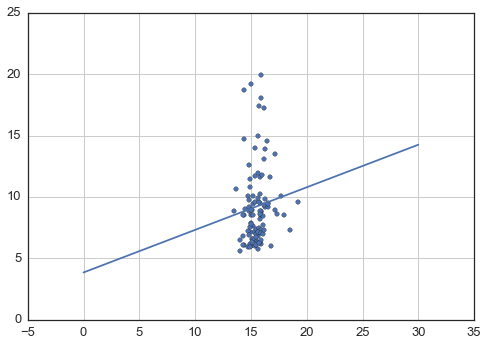

In [44]:
# Plot the data with a regression line.
# The regression line is generated by model1, which we just trained.
plt.scatter(df_athletesNew.loc[:,['Hg']], df_athletesNew.loc[:,['Bfat']])
xs = np.linspace(0, 30, 2)
ys_predicted = model1.predict({'Hg': xs})
plt.plot(xs, ys_predicted)
plt.grid(True)

In [45]:
#normalize data
df_athletesNew['Ht_normalized'] = (df_athletesNew['Ht'] - df_athletesNew['Ht'].mean()) / df_athletesNew['Ht'].std()
df_athletesNew['Wt_normalized'] = (df_athletesNew['Wt'] - df_athletesNew['Wt'].mean()) / df_athletesNew['Wt'].std()
df_athletesNew['Hg_normalized'] = (df_athletesNew['Hg'] - df_athletesNew['Hg'].mean()) / df_athletesNew['Hg'].std()
df_athletesNew['BMI_normalized'] = (df_athletesNew['BMI'] - df_athletesNew['BMI'].mean()) / df_athletesNew['BMI'].std()
df_athletesNew['Bfat_normalized'] = (df_athletesNew['Bfat'] - df_athletesNew['Bfat'].mean()) / df_athletesNew['Bfat'].std()
df_athletesNew['b_ball_normalized'] = (df_athletesNew['b_ball'] - df_athletesNew['b_ball'].mean()) / df_athletesNew['b_ball'].std()
df_athletesNew['row_normalized'] = (df_athletesNew['row'] - df_athletesNew['row'].mean()) / df_athletesNew['row'].std()
df_athletesNew['swim_normalized'] = (df_athletesNew['swim'] - df_athletesNew['swim'].mean()) / df_athletesNew['swim'].std()
df_athletesNew['t_400m_normalized'] = (df_athletesNew['t_400m'] - df_athletesNew['t_400m'].mean()) / df_athletesNew['t_400m'].std()
df_athletesNew['w_polo_normalized'] = (df_athletesNew['w_polo'] - df_athletesNew['w_polo'].mean()) / df_athletesNew['w_polo'].std()
df_athletesNew['t_sprnt_normalized'] = (df_athletesNew['t_sprnt'] - df_athletesNew['t_sprnt'].mean()) / df_athletesNew['t_sprnt'].std()
df_athletesNew['field_normalized'] = (df_athletesNew['field'] - df_athletesNew['field'].mean()) / df_athletesNew['field'].std()
df_athletesNew['tennis_normalized'] = (df_athletesNew['tennis'] - df_athletesNew['tennis'].mean()) / df_athletesNew['tennis'].std()
df_athletesNew.head()

,Ht,Wt,Hg,BMI,Bfat,b_ball,row,swim,t_400m,w_polo,...,BMI_normalized,Bfat_normalized,b_ball_normalized,row_normalized,swim_normalized,t_400m_normalized,w_polo_normalized,t_sprnt_normalized,field_normalized,tennis_normalized
100,172.7,67.0,15.9,22.46,8.47,0,0,1,0,0,...,-0.521640,-0.245199,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038
101,176.5,74.4,15.2,23.88,7.68,0,0,1,0,0,...,-0.008538,-0.493260,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038
102,183.0,79.3,15.9,23.68,6.16,0,0,1,0,0,...,-0.080805,-0.970543,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038
103,194.4,87.5,15.0,23.15,8.56,0,0,1,0,0,...,-0.272315,-0.216938,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038
104,193.4,83.5,15.6,22.32,6.86,0,0,1,0,0,...,-0.572227,-0.750742,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038


In [46]:
#drop irrelevant columns
df_athletesFinal = df_athletesNew.drop(df_athletesNew[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]], axis=1)
df_athletesFinal.head()

,Wt_normalized,Hg_normalized,BMI_normalized,Bfat_normalized,b_ball_normalized,row_normalized,swim_normalized,t_400m_normalized,w_polo_normalized,t_sprnt_normalized,field_normalized,tennis_normalized
100,-1.251267,0.371486,-0.521640,-0.245199,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038
101,-0.654793,-0.377782,-0.008538,-0.493260,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038
102,-0.259831,0.371486,-0.080805,-0.970543,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038
103,0.401126,-0.591859,-0.272315,-0.216938,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038
104,0.078708,0.050371,-0.572227,-0.750742,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038


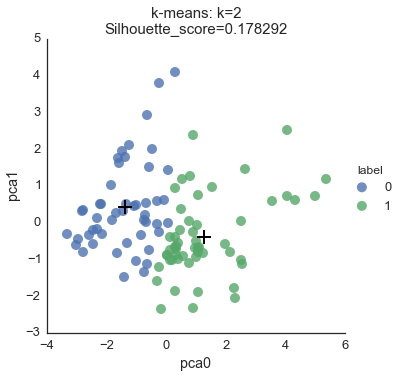

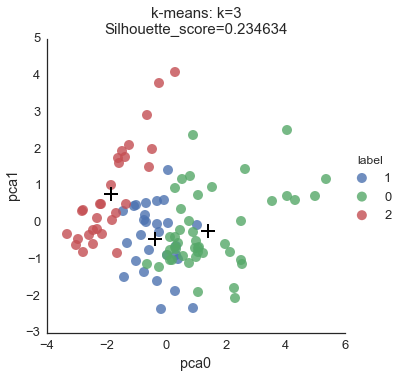

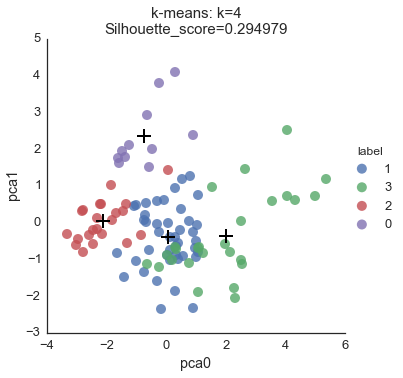

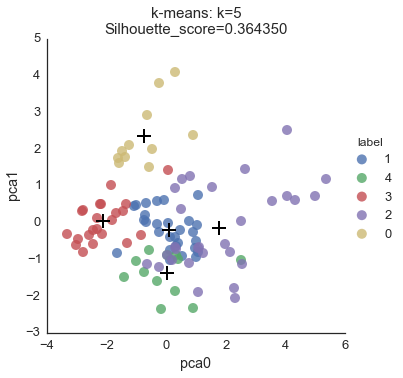

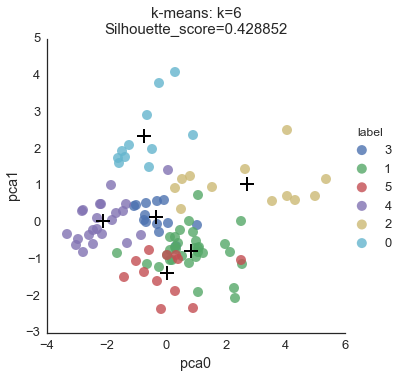

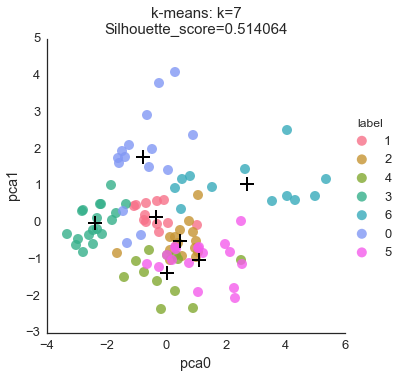

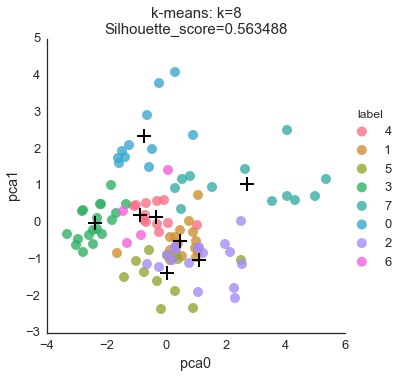

In [47]:
# 1f. k-means clustering

# Build PCA model for visualizing high-dim cluster results
pca_model = skd.PCA(n_components=2).fit(df_athletesFinal)
pca_data = pca_model.transform(df_athletesFinal)
df_pca = pd.DataFrame(pca_data, columns=['pca0', 'pca1'])

for k in range(2,9):
    kmeans_model = skc.KMeans(k).fit(df_athletesFinal)
    centroids = kmeans_model.cluster_centers_
    centroids_pca = pca_model.transform(centroids)
    cluster_labels = kmeans_model.labels_
    df_pca['label'] = cluster_labels
    silh_score = skm.silhouette_score(df_athletesFinal, cluster_labels)
    
    plt.figure()
    f = sns.lmplot(x='pca0', y='pca1', data=df_pca, 
                   hue='label', fit_reg=False, 
                   scatter_kws={'s': 100})
    f.ax.scatter(centroids_pca[:,0], centroids_pca[:,1], 
                 marker='+', s=200, linewidths=2, color='black')
    plt.title('k-means: k=%d\nSilhouette_score=%f'%(
                k, silh_score), fontsize=15)

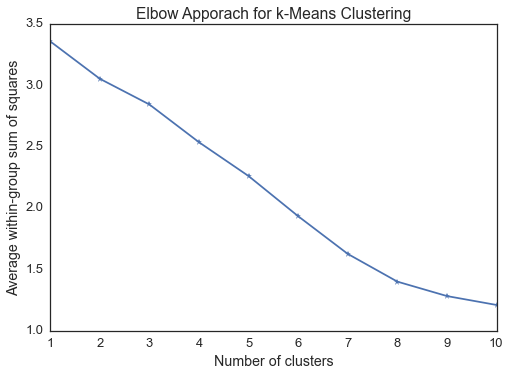

In [48]:
# Determine the best number of clusters: Elbow method
ks = range(1, 11)
kmeans_models = [skc.KMeans(k).fit(df_athletesFinal) for k in ks]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(df_athletesFinal, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d) / df_athletesFinal.shape[0] for d in dist]

plt.plot(ks, avgWithinSS, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Average within-group sum of squares')
plt.title('Elbow Apporach for k-Means Clustering')
#find an appropriate number of clusters

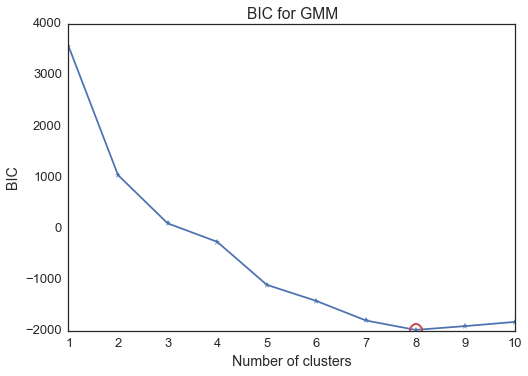

In [49]:
# Determine the best number of clusters: Information Criterion approach
ks = range(1, 11)
gmms = [skmix.GMM(k).fit(df_athletesFinal) for k in ks]
bics = [g.bic(df_athletesFinal) for g in gmms]
plt.plot(ks, bics, 'b*-')

kIdx = np.argmin(bics)  # <-- the selected index
plt.plot(ks[kIdx], bics[kIdx], marker='o', markersize=12,
         markeredgewidth=2, markeredgecolor='r',
         markerfacecolor='None')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.title('BIC for GMM')
#find an appropriate number of clusters

In [50]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df_athletesNew.index = range(102) #change index numbers
df_athletesNew['cluster_label'] = df_pca['label']
df_athletesNew.head()

,Ht,Wt,Hg,BMI,Bfat,b_ball,row,swim,t_400m,w_polo,...,Bfat_normalized,b_ball_normalized,row_normalized,swim_normalized,t_400m_normalized,w_polo_normalized,t_sprnt_normalized,field_normalized,tennis_normalized,cluster_label
0,172.7,67.0,15.9,22.46,8.47,0,0,1,0,0,...,-0.245199,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038,4
1,176.5,74.4,15.2,23.88,7.68,0,0,1,0,0,...,-0.493260,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038,4
2,183.0,79.3,15.9,23.68,6.16,0,0,1,0,0,...,-0.970543,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038,4
3,194.4,87.5,15.0,23.15,8.56,0,0,1,0,0,...,-0.216938,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038,4
4,193.4,83.5,15.6,22.32,6.86,0,0,1,0,0,...,-0.750742,-0.363354,-0.413187,2.603658,-0.460635,-0.445016,-0.345968,-0.363354,-0.201038,4
